In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Maybank.csv')

In [3]:
# Preprocess and normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Define the look_back window and create input-output pairs
look_back = 30
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back].flatten())
    y.append(scaled_data[i+look_back][0])

X = np.array(X)
y = np.array(y)

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(units=64, activation='sigmoid', input_dim=look_back),
    Dense(units=32, activation='sigmoid'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='linear')  # No activation function for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_split=0.1)

Epoch 1/1000
55/55 [==============================] - 1s 5ms/step - loss: 0.0475 - val_loss: nan
Epoch 2/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: nan
Epoch 3/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: nan
Epoch 4/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: nan
Epoch 5/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: nan
Epoch 6/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: nan
Epoch 7/1000
55/55 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: nan
Epoch 8/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: nan
Epoch 9/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: nan
Epoch 10/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: nan
Epoch 11/1000
55/55 [========

16/16 [==============================] - 0s 1ms/step
Mean Squared Error: 0.0066


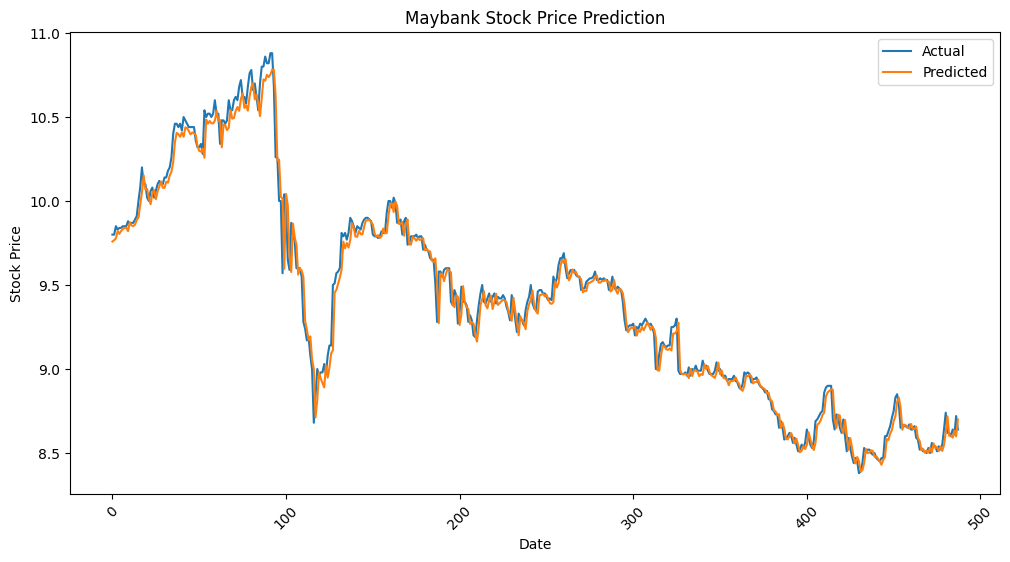

In [6]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()# Visualize the results with correctly formatted dates